# Team Members:
 - Javier Suarez Duran - A01707380
 - Jaime Lopez Hernández - A00571842
 - Diego Alfonso Ramírez Montes - A01707596
 - Ricardo Andrés Cáceres Villibord - A01706972

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## TC 3007B
### Word Embeddings

<br>

#### Activity 1: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictiorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (10%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    - Functionality (90%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (15% each for a total of 30%)
       - Similarity function (30%)
       - Analogy function (30%)
|



#### Import libraries

In [10]:
# IMPORTING LIBRARIES
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [11]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Data/Embeddings/glove.6B.50d.txt'
emb_dim = 50

In [12]:
# FUNCTION TO CREATE THE DICTIONARY OF A EMBEDDING FILE
def create_emb_dictionary(path) :
    embeddings_dict = {}
    with open(path, 'r', encoding = 'utf-8') as file :
        for line in file :
            values = line.split()
            word = values[0]
            vector = list(map(float, values[1:]))
            embeddings_dict[word] = vector
    return embeddings_dict

In [13]:
# CREATING DICTIONARY
embeddings_dict = create_emb_dictionary(PATH)

In [14]:
# SERIALIZE
with open('embeddings_dict_50D.pkl', 'wb') as f :
    pickle.dump(embeddings_dict, f)

In [15]:
# DESERIALIZE
with open('embeddings_dict_50D.pkl', 'rb') as f :
    embeddings_dict = pickle.load(f)

#### See some embeddings

In [16]:
# SHOWING SOME OF THE WORDS OF THE EMBEDDING
def show_n_first_words(path, n_words) :
        with open(path, 'r') as f :
            for i, line in enumerate(f) :
                print(line.split(), len(line.split()[1:]))
                if i >= n_words :
                    break

In [17]:
# PRINTING THE FIRST FIVE WORDS IN THE EMBEDDING
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [37]:
# FUNCTION TO PLOT THE EMBEDDINGS
def plot_embeddings(emb_path, words2show, embeddings_dict, func) :
    embeddings = {}

    with open(emb_path, 'r', encoding = 'utf-8') as file :
        for line in file :
            values = line.strip().split()
            word = values[0]
            vector = np.array([float(val) for val in values[1:]])
            embeddings[word] = vector

    word_vectors = np.array([embeddings[word] for word in words2show])

    if func == 'PCA' :
        reducer = PCA(n_components = 2)
    elif func == 'TSNE' :
        reducer = TSNE(n_components = 2)
    else :
        raise ValueError("Unsupported dimensionality reduction technique.")

    reduced_embeddings = reducer.fit_transform(word_vectors)

    plt.figure(figsize = (10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c = 'blue', edgecolors = 'k')
    for i, word in enumerate(words2show) :
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title(f'{func} Visualization of GloVe Embeddings')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [38]:
words = ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

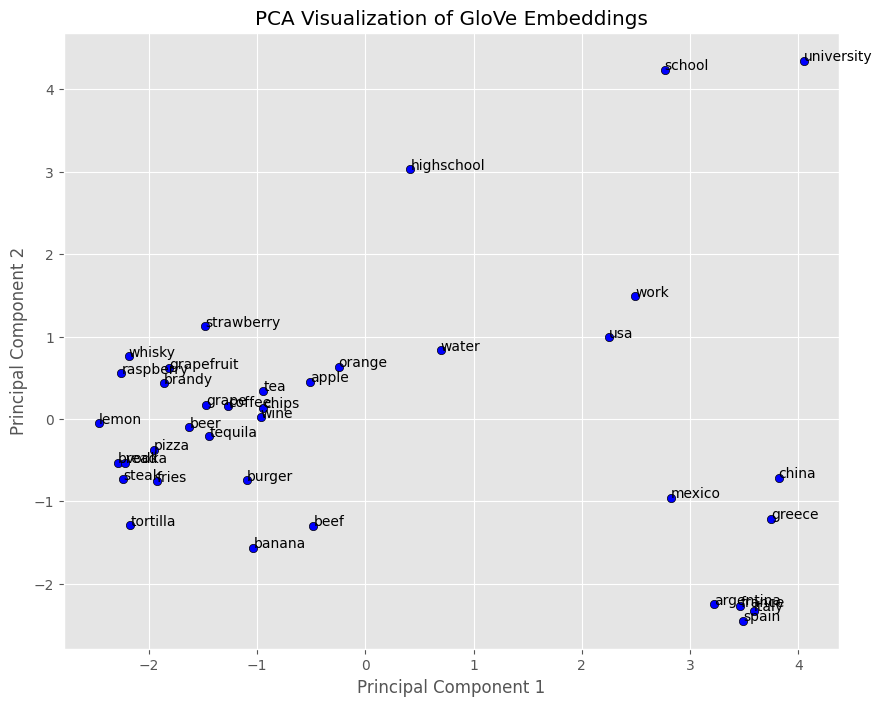

In [39]:
# PLOTTING THE PCA COMPONENTS OF THE EMBEDDINGS
plot_embeddings(PATH, words, embeddings_dict, 'PCA')

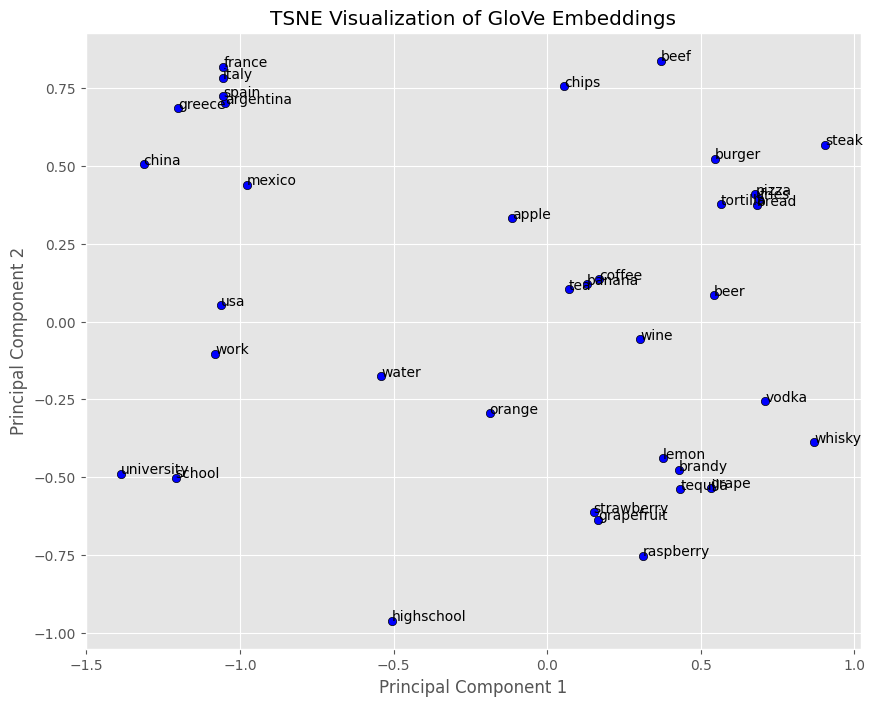

In [40]:
# PLOTTING THE t-SNE COMPONENTS OF THE EMBEDDINGS
plot_embeddings(PATH, words, embeddings_dict, 'TSNE')

### Let us compute analogies

In [41]:
# AUXILIAR FUNCTION FOR THE ANALOGY AND THE MOST SIMILAR WORD FUNCTION
def cosine_similarity(vec1, vec2) :
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [44]:
# ANALOGY
def analogy(word1, word2, word3, embeddings_dict):
    if word1 in embeddings_dict and word2 in embeddings_dict and word3 in embeddings_dict :
        vec1 = np.array(embeddings_dict[word1])
        vec2 = np.array(embeddings_dict[word2])
        vec3 = np.array(embeddings_dict[word3])

        analogy_vec = vec2 - vec1 + vec3

        best_similarity = -1
        best_word = None

        for word, vec in embeddings_dict.items() :
            if word not in [word1, word2, word3] :
                similarity = cosine_similarity(analogy_vec, np.array(vec))
                if similarity > best_similarity :
                    best_similarity = similarity
                    best_word = word

        print('The best word is: ', best_word)
    else:
        print("Words not found in the embeddings dictionary.")

In [45]:
analogy('man', 'king', 'woman', embeddings_dict)

The best word is:  queen


In [46]:
# FUNCTION TO FIND THE MOST SIMILAR WORD
def find_most_similar(word, embeddings_dict, top_n = 10) :
    if word in embeddings_dict :
        vec = embeddings_dict[word]
        similarities = [(w, cosine_similarity(vec, embeddings_dict[w])) for w in embeddings_dict if w != word]
        sorted_similarities = sorted(similarities, key=lambda x: x[1], reverse=True)
        return sorted_similarities[: top_n]
    else :
        print(f"{word} not found in the embeddings dictionary.")

In [47]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [48]:
for i, w in enumerate(most_similar, 1) :
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
